# Install libraries 

In [3]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time
import numpy as np
import pandas as pd

from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import MinMaxScaler

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [95]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Read the Excel file into a Pandas DataFrame

In [38]:
# Read the Excel file into a Pandas DataFrame
data = pd.read_csv('X_train.csv')

# Examine the dataframe

In [56]:
data.head()

,Protocol,Info,Length,Delta,Type
0,4,Rcvd Link Key Request,9,0.010473,0
1,3,Sent Link Key Request Negative Reply,10,0.010473,0
2,4,Rcvd Link Key Request,9,0.017913,0
3,4,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,0
4,3,Sent Link Key Request Negative Reply,10,0.002882,0


In [11]:
data.columns

Index(['Protocol', 'Info', 'Length', 'Delta', 'Type'], dtype='object')

# Show the unique values of the type of attacks

In [13]:
data.Protocol.unique()

array(['HCI_EVT', 'HCI_CMD', 'HCI H4 Broadcom', 'LMP', 'Baseband',
       'L2CAP', 'SDP', 'BNEP', 'RFCOMM', 'OBEX'], dtype=object)

# Count the frequencies of the type of attack

In [40]:
data['Protocol'].value_counts()

Protocol
OBEX               2575
LMP                1546
HCI_EVT             964
RFCOMM              638
HCI_CMD             287
L2CAP               231
Baseband             78
SDP                  44
HCI H4 Broadcom      37
BNEP                  2
Name: count, dtype: int64

# Plot the frequencies of every type of attack

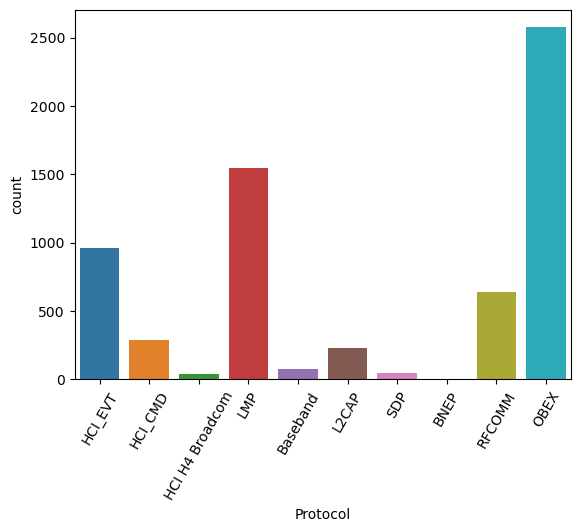

In [15]:
sns.countplot(x='Protocol', data=data)
plt.xticks(rotation=60)
plt.show()


# Check for duplication

In [16]:
# Step 1: Check for duplicated rows
duplicates = data.duplicated()

# Step 2: Count the occurrences of duplicates
duplicate_counts = duplicates.sum()
print("Number of duplicated rows:", duplicate_counts)


Number of duplicated rows: 0


# Building The Classification Models

#### Classification models(Support Vector machine & Naive Bayes)

# Support Vector machine (SVM)

# Train the SVM model

In [20]:
filepath = "X_train.csv"

SVM = pd.read_csv(filepath, nrows=27000)

In [21]:
SVM.shape

(6402, 5)

In [26]:
data.Length

0        9
1       10
2        9
3       13
4       10
        ..
6397    14
6398     8
6399    21
6400    64
6401    64
Name: Length, Length: 6402, dtype: int64

In [43]:
# Initialize a label encoder for the target
label_encoder = LabelEncoder()
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# Select features to one-hot encode
features_to_encode = ['Type']

# Create a column transformer to apply one-hot encoding to the specified features
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), features_to_encode)],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Apply the transformer to the data
data_encoded = column_transformer.fit_transform(data)
data_encoded = pd.DataFrame(data_encoded, columns=[*column_transformer.get_feature_names_out()])


In [47]:
# Initialize a label encoder for the target
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])



# Create a column transformer to apply one-hot encoding to the specified features
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), features_to_encode)],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Apply the transformer to the data
data_encoded = column_transformer.fit_transform(data)
data_encoded = pd.DataFrame(data_encoded, columns=[*column_transformer.get_feature_names_out()])


In [52]:
data.Type.unique()

array([ 0,  1,  2, 11,  3,  4,  7,  8, 10,  5,  6,  9])

In [97]:
from sklearn.svm import SVC
# Define the features and target
features = ['Length', 'Delta']
target = 'Protocol'

# Load the data
X = SVM[features]
Y = SVM[target]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

# Create the SVM classifier model and fit it to the training data
SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True)
SVM_classifier.fit(X_train, Y_train)

# Evaluate the model on the testing data
score = SVM_classifier.score(X_test, Y_test)
print('Model Accuracy: ', score)
print()

# Predict the labels of the test set
y_pred = SVM_classifier.predict(X_test)

# Suppress the UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.metrics')

# Calculate the classification report of the model
report = classification_report(Y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)
print()

# Calculate the time taken by the model to run
start_time = time.time()
print()
end_time = time.time()
print('Time taken: ', end_time - start_time, 'seconds')




[LibSVM]Model Accuracy:  0.6474820143884892

Classification Report:
                 precision    recall  f1-score   support

       Baseband       0.00      0.00      0.00         2
HCI H4 Broadcom       0.00      0.00      0.00         1
        HCI_CMD       0.00      0.00      0.00         6
        HCI_EVT       0.00      0.00      0.00        31
          L2CAP       0.00      0.00      0.00         1
            LMP       0.40      1.00      0.57        33
           OBEX       1.00      0.95      0.97        60
         RFCOMM       0.00      0.00      0.00         5

       accuracy                           0.65       139
      macro avg       0.18      0.24      0.19       139
   weighted avg       0.53      0.65      0.56       139



Time taken:  0.0 seconds


# Train the Naive Bayse model

### Read the data

In [57]:
filepath = "X_test.csv"

NP = pd.read_csv(filepath, nrows=27000)

In [58]:

features = ['Length', 'Delta', 'Type']
target = 'Protocol'

# Normalize the features
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, random_state=100, test_size=0.2)

# Suppress the UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.metrics')

clf = GaussianNB()

start = time.time()
print('program start...')
print()

clf.fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.predict(X_test)
print(y_pred)
print()

end = time.time()

print(end - start, 'seconds')

print("Classification Report:")
print(classification_report(Y_test, y_pred))


program start...


0.5899280575539568

['HCI_EVT' 'LMP' 'OBEX' 'OBEX' 'OBEX' 'HCI_EVT' 'HCI_CMD' 'HCI_EVT'
 'RFCOMM' 'RFCOMM' 'HCI_CMD' 'RFCOMM' 'OBEX' 'RFCOMM' 'HCI_CMD'
 'HCI H4 Broadcom' 'HCI_CMD' 'OBEX' 'OBEX' 'OBEX' 'LMP' 'HCI_EVT'
 'HCI_EVT' 'HCI_EVT' 'OBEX' 'RFCOMM' 'HCI_CMD' 'HCI H4 Broadcom' 'OBEX'
 'OBEX' 'OBEX' 'HCI_CMD' 'OBEX' 'HCI_CMD' 'OBEX' 'HCI_CMD' 'OBEX' 'LMP'
 'HCI_CMD' 'HCI_CMD' 'RFCOMM' 'HCI_CMD' 'HCI_CMD' 'OBEX' 'HCI_CMD' 'OBEX'
 'RFCOMM' 'HCI_EVT' 'OBEX' 'HCI_CMD' 'OBEX' 'RFCOMM' 'HCI_EVT' 'LMP'
 'HCI_CMD' 'HCI_EVT' 'RFCOMM' 'OBEX' 'HCI_EVT' 'OBEX' 'HCI_CMD' 'LMP'
 'LMP' 'HCI_CMD' 'OBEX' 'OBEX' 'HCI_CMD' 'OBEX' 'HCI_CMD'
 'HCI H4 Broadcom' 'HCI_CMD' 'RFCOMM' 'HCI_CMD' 'HCI_CMD' 'OBEX' 'HCI_CMD'
 'HCI_EVT' 'LMP' 'RFCOMM' 'RFCOMM' 'OBEX' 'OBEX' 'OBEX' 'HCI_EVT'
 'HCI_CMD' 'HCI_EVT' 'HCI H4 Broadcom' 'OBEX' 'HCI_EVT' 'OBEX' 'OBEX'
 'HCI_CMD' 'Baseband' 'HCI_CMD' 'HCI_EVT' 'HCI_EVT' 'RFCOMM' 'LMP'
 'HCI_CMD' 'OBEX' 'OBEX' 'RFCOMM' 'OBEX' 'HCI_CMD' 'HCI_EVT' 'HCI_CMD'



## Classification models( Decision Tree & Neural Networks)

### Read the dataframe


In [59]:
filepath = "X_Train.csv"
DS = pd.read_csv(filepath, nrows=27000)

# Train Decision Tree Model (Highest Accuracy)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time
import warnings

features = ['Length', 'Delta']
target = 'Protocol'
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(DS[features], DS[target], random_state=5, test_size=0.2)

# Create Decision Tree classifier
classifier = DecisionTreeClassifier()

start = time.time()
print('program start...')
print()

# Fit the model
classifier.fit(X_train, Y_train)
print()

# Evaluate the model
score = classifier.score(X_test, Y_test)
print(score)
print()
y_pred = classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

# Suppress the UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.metrics')

print("Classification Report:")
print(classification_report(Y_test, y_pred))


program start...


0.9039812646370023

['OBEX' 'RFCOMM' 'L2CAP' ... 'LMP' 'OBEX' 'OBEX']

program end...

time cost: 
0.031014680862426758 seconds
Classification Report:
                 precision    recall  f1-score   support

       Baseband       1.00      1.00      1.00        13
HCI H4 Broadcom       0.25      0.20      0.22        10
        HCI_CMD       0.69      0.79      0.73        47
        HCI_EVT       0.87      0.86      0.86       190
          L2CAP       0.67      0.61      0.64        46
            LMP       0.86      0.89      0.87       311
           OBEX       0.99      0.99      0.99       523
         RFCOMM       0.93      0.88      0.91       131
            SDP       0.60      0.60      0.60        10

       accuracy                           0.90      1281
      macro avg       0.76      0.76      0.76      1281
   weighted avg       0.90      0.90      0.90      1281



# Save the model with the highest accuracy 

Since the desition tree model is the model with the highest classification accuracy, we will save it as .pkl

# Save it into a pkl

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

# Assuming DS is your dataset and it has been previously defined
# Select features and target variable
features = ['Length', 'Delta']
target = 'Protocol'

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(DS[features], DS[target], random_state=5, test_size=0.2)

# Create pipeline with Decision Tree classifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Fit the model using the pipeline
pipeline.fit(X_train, Y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, Y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Save the pipeline as a .pkl file
filename = 'decision_tree_pipeline.pkl'
joblib.dump(pipeline, filename)
print("Pipeline saved as", filename)


Accuracy: 0.9055425448868072
Classification Report:
                 precision    recall  f1-score   support

       Baseband       1.00      1.00      1.00        13
HCI H4 Broadcom       0.25      0.20      0.22        10
        HCI_CMD       0.70      0.79      0.74        47
        HCI_EVT       0.87      0.86      0.87       190
          L2CAP       0.67      0.61      0.64        46
            LMP       0.86      0.89      0.87       311
           OBEX       0.99      0.99      0.99       523
         RFCOMM       0.93      0.88      0.91       131
            SDP       0.67      0.60      0.63        10

       accuracy                           0.91      1281
      macro avg       0.77      0.76      0.76      1281
   weighted avg       0.91      0.91      0.91      1281

Pipeline saved as decision_tree_pipeline.pkl
